In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "sprihasinha"
os.environ['KAGGLE_KEY'] = "b85d5299a8a1b65f252d7fb521032c38"

In [ ]:
!kaggle datasets download -d fusicfenta/chest-xray-for-covid19-detection

 97% 170M/176M [00:02<00:00, 91.7MB/s]
100% 176M/176M [00:02<00:00, 73.8MB/s]


In [ ]:
!unzip "/content/chest-xray-for-covid19-detection.zip"

Archive:  /content/chest-xray-for-covid19-detection.zip
  inflating: Dataset/Prediction/NORMAL2-IM-0338-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0339-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0340-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0341-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0352-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0353-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0354-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0357-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0370-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0372-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0373-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0374-0001.jpeg  
  inflating: Dataset/Prediction/SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg  
  inflating: Dataset/Prediction/SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg  
  inflating: Dataset/Prediction/SARS-10.1148rg.2420351

In [ ]:
len(os.listdir('/content/Dataset'))

3

In [ ]:
len(os.listdir('/content/Dataset/Train'))

2

In [ ]:
len(os.listdir('/content/Dataset/Val'))

2

In [ ]:
len(os.listdir('/content/Dataset/Train/Covid'))

144

In [ ]:
len(os.listdir('/content/Dataset/Train/Normal'))

144

In [ ]:
len(os.listdir('/content/Dataset/Val/Covid'))

30

In [ ]:
len(os.listdir('/content/Dataset/Val/Normal'))

30

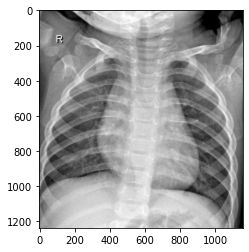

In [ ]:
import cv2
img = cv2.imread('/content/Dataset/Train/Normal/IM-0140-0001.jpeg')
import matplotlib.pyplot as plt
plt.imshow(img)

In [ ]:
img.shape

(1237, 1156, 3)

In [ ]:
urls = os.listdir('/content/Dataset/Train/Covid')        #name of images
path = "/content/Dataset/Train/Covid" + urls[0]         #one image path at a time
path

'/content/Dataset/Train/Covidlancet-case2b.jpg'

In [ ]:
def loadImages(path, urls, target):
  images = []
  labels = []
  #for root, folder, files in os.walk(path)
  for i in range(len(urls)):
    img_path = path + "/" + urls[i]
    img = cv2.imread(img_path)        #read image one by one
    img = img / 255.0
    #print(img_path)
    # if we want to resize the images
    img = cv2.resize(img, (100, 100))
    images.append(img)                #storing images one by one
    labels.append(target)            
  images = np.asarray(images)
  return images, labels

In [ ]:
import numpy as np
covid_path = "/content/Dataset/Train/Covid"
covidUrl = os.listdir(covid_path)
covidImages, covidTargets = loadImages(covid_path, covidUrl, 1) 

In [ ]:
normal_path = "/content/Dataset/Train/Normal"
normal_urls = os.listdir(normal_path)
normalImages, normalTargets = loadImages(normal_path, normal_urls, 0)

In [ ]:
#convert data as numpy array as list cannot do everything like size, shape
covidImages = np.asarray(covidImages)
normalImages = np.asarray(normalImages)

In [ ]:
len(covidUrl), len(covidImages)

(144, 144)

In [ ]:
covidImages.shape

(144, 100, 100, 3)

In [ ]:
covidImages[0].shape

(100, 100, 3)

In [ ]:
normalImages.shape

(144, 100, 100, 3)

In [ ]:
data = np.r_[covidImages, normalImages]  #np.r_-----to stack the data row wise, similarly c_ to concatenate col wise.
data.shape

(288, 100, 100, 3)

In [ ]:
targets = np.r_[covidTargets, normalTargets]
targets.shape 

(288,)

In [ ]:
data = data / 255.0

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.25)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
model = Sequential([
    Conv2D(32, 3, input_shape=(100,100,3), activation='relu'),
    MaxPooling2D(),   #by default 2x2 pooling size so wrote nothing in brackets
    
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    
    Flatten(),
    
    Dense(512, activation='relu'),    
    
    Dense(256, activation='relu'),
    
    Dense(1, activation='sigmoid')
])

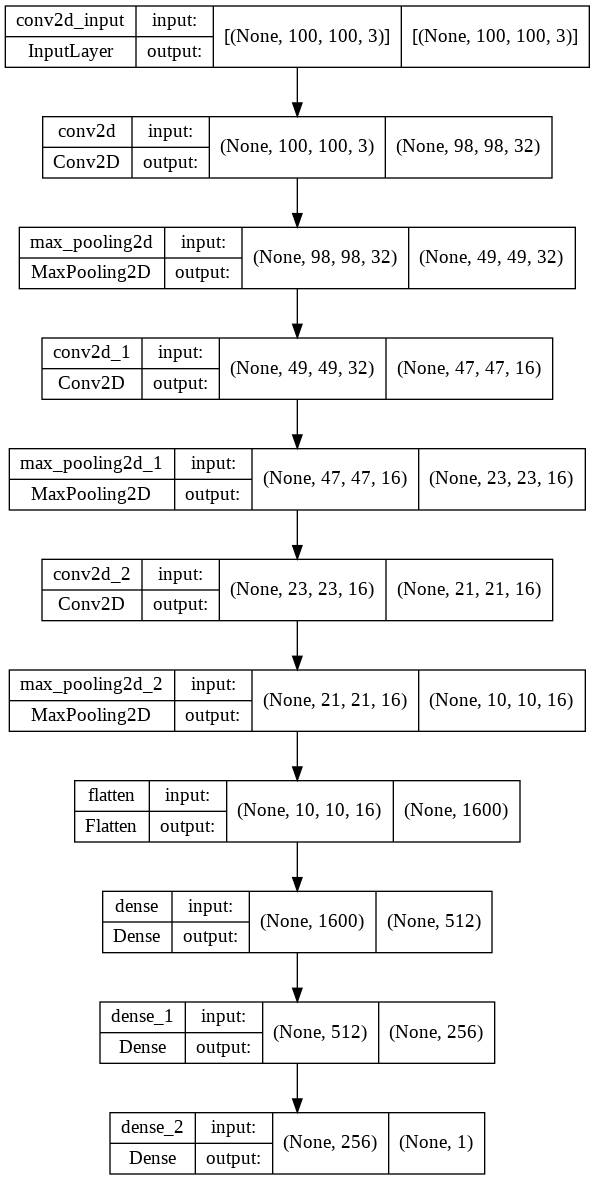

In [ ]:
from tensorflow.keras.utils import plot_model as plotter
plotter(model, to_file="arch.png", show_shapes=True, show_layer_names=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 16)       0

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])
model.fit(x_train, y_train,batch_size=3,epochs=5,validation_data=(x_test, y_test))

Epoch 1/5
72/72 [==============================] - 4s 48ms/step - loss: 0.4059 - accuracy: 0.8472 - val_loss: 0.3796 - val_accuracy: 0.8333
Epoch 2/5
72/72 [==============================] - 3s 44ms/step - loss: 0.1540 - accuracy: 0.9398 - val_loss: 0.0904 - val_accuracy: 0.9583
Epoch 3/5
72/72 [==============================] - 3s 44ms/step - loss: 0.0980 - accuracy: 0.9630 - val_loss: 0.1049 - val_accuracy: 0.9722
Epoch 4/5
72/72 [==============================] - 3s 44ms/step - loss: 0.1746 - accuracy: 0.9491 - val_loss: 0.2551 - val_accuracy: 0.8889
Epoch 5/5
72/72 [==============================] - 3s 44ms/step - loss: 0.1357 - accuracy: 0.9583 - val_loss: 0.1153 - val_accuracy: 0.9583


In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 7.2 MB/s 


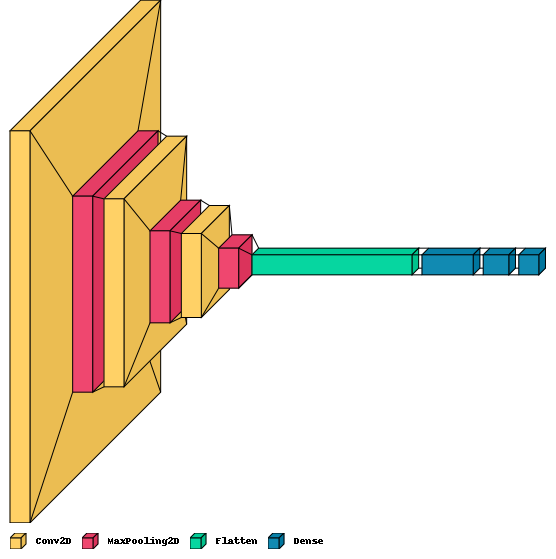

In [ ]:
import visualkeras
visualkeras.layered_view(model,legend=True)

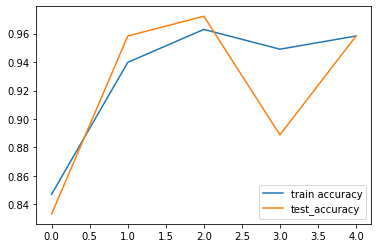

In [ ]:
plt.plot(model.history.history['accuracy'], label = 'train accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

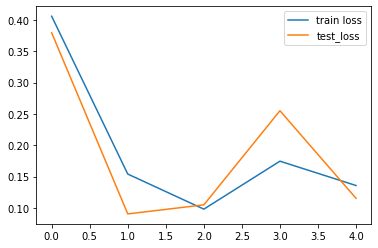

In [ ]:
plt.plot(model.history.history['loss'], label = 'train loss')
plt.plot(model.history.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()

In [ ]:
#experimenting with other models
from tensorflow.keras.applications import Xception,VGG16,VGG19,ResNet50,InceptionV3,InceptionResNetV2,MobileNet,MobileNetV2

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=45,
    fill_mode='nearest'
    )

# test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    '/content/Dataset/Train',
    target_size=(224,224),
    batch_size=6,
    class_mode='binary',
    shuffle=True,
    # color_mode="grayscale"
    )

validation_generator = datagen.flow_from_directory(
    '/content/Dataset/Val',
    target_size=(224,224),
    batch_size=6,
    class_mode='binary',
    shuffle=True,
    # color_mode="grayscale"
    )

Found 288 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
#experimenting with other models
from tensorflow.keras.applications import Xception,VGG16,VGG19,ResNet50,InceptionV3,InceptionResNetV2,MobileNet,MobileNetV2

hist = []

In [ ]:
#Xception
model = Sequential()
pretrained_model= Xception(include_top=False,input_shape=(224,224,3),weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable=False
model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_generator,steps_per_epoch=148/6,epochs=3,validation_data=validation_generator,validation_steps=40/6,verbose=1)
h = model.evaluate(validation_generator,verbose=1)
hist.append([h[0],h[1],"Xception"])

83697664/83683744 [==============================] - 1s 0us/step
Epoch 1/3
24/24 [==============================] - 43s 2s/step - loss: 2.5602 - accuracy: 0.9067 - val_loss: 2.4317 - val_accuracy: 0.9762
Epoch 2/3
24/24 [==============================] - 38s 2s/step - loss: 1.2306 - accuracy: 0.9667 - val_loss: 1.4531 - val_accuracy: 0.9524
Epoch 3/3
10/10 [==============================] - 12s 1s/step - loss: 5.1287 - accuracy: 0.8500


In [ ]:
#VGG16
model = Sequential()
pretrained_model= VGG16(include_top=False,input_shape=(224,224,3),weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable=False
model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_generator,steps_per_epoch=148/6,epochs=3,validation_data=validation_generator,validation_steps=40/6,verbose=1)
h = model.evaluate(validation_generator,verbose=1)
hist.append([h[0],h[1],"VGG16"])

58900480/58889256 [==============================] - 0s 0us/step
Epoch 1/3
24/24 [==============================] - 93s 4s/step - loss: 1.1415 - accuracy: 0.7667 - val_loss: 0.1252 - val_accuracy: 0.9524
Epoch 2/3
24/24 [==============================] - 91s 4s/step - loss: 0.1129 - accuracy: 0.9533 - val_loss: 0.1071 - val_accuracy: 0.9524
Epoch 3/3
10/10 [==============================] - 29s 3s/step - loss: 0.1162 - accuracy: 0.9500


In [ ]:
#VGG19
model = Sequential()
pretrained_model= VGG19(include_top=False,input_shape=(224,224,3),weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable=False
model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_generator,steps_per_epoch=148/6,epochs=3,validation_data=validation_generator,validation_steps=40/6,verbose=1)
h = model.evaluate(validation_generator,verbose=1)
hist.append([h[0],h[1],"VGG19"])

80150528/80134624 [==============================] - 0s 0us/step
Epoch 1/3
24/24 [==============================] - 116s 5s/step - loss: 0.9601 - accuracy: 0.8067 - val_loss: 0.2614 - val_accuracy: 0.9524
Epoch 2/3
24/24 [==============================] - 113s 5s/step - loss: 0.1782 - accuracy: 0.9600 - val_loss: 0.0472 - val_accuracy: 0.9762
Epoch 3/3
13/24 [==============>...............] - ETA: 41s - loss: 0.2004 - accuracy: 0.9359

In [ ]:
#ResNet50
model = Sequential()
pretrained_model= ResNet50(include_top=False,input_shape=(224,224,3),weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable=False
model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_generator,steps_per_epoch=148/6,epochs=3,validation_data=validation_generator,validation_steps=40/6,verbose=1)
h = model.evaluate(validation_generator,verbose=1)
hist.append([h[0],h[1],"ResNet50"])

Epoch 1/3
24/24 [==============================] - 40s 1s/step - loss: 4.3792 - accuracy: 0.4600 - val_loss: 0.6933 - val_accuracy: 0.4762
Epoch 2/3
24/24 [==============================] - 37s 2s/step - loss: 0.7408 - accuracy: 0.5067 - val_loss: 0.6938 - val_accuracy: 0.4762
Epoch 3/3
10/10 [==============================] - 11s 1s/step - loss: 0.6934 - accuracy: 0.5000


In [ ]:
#InceptionV3
model = Sequential()
pretrained_model= InceptionV3(include_top=False,input_shape=(224,224,3),weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable=False
model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_generator,steps_per_epoch=148/6,epochs=3,validation_data=validation_generator,validation_steps=40/6,verbose=1)
h = model.evaluate(validation_generator,verbose=1)
hist.append([h[0],h[1],"InceptionV3"])

87924736/87910968 [==============================] - 1s 0us/step
Epoch 1/3
24/24 [==============================] - 33s 1s/step - loss: 3.6415 - accuracy: 0.8800 - val_loss: 0.4373 - val_accuracy: 0.9762
Epoch 2/3
24/24 [==============================] - 26s 1s/step - loss: 0.7483 - accuracy: 0.9533 - val_loss: 1.4277 - val_accuracy: 0.9524
Epoch 3/3
10/10 [==============================] - 8s 748ms/step - loss: 0.1085 - accuracy: 0.9833


In [ ]:
#InceptionResNetV2
model = Sequential()
pretrained_model= InceptionResNetV2(include_top=False,input_shape=(224,224,3),weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable=False
model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_generator,steps_per_epoch=148/6,epochs=3,validation_data=validation_generator,validation_steps=40/6,verbose=1)
h = model.evaluate(validation_generator,verbose=1)
hist.append([h[0],h[1],"InceptionResNetV2"])

219070464/219055592 [==============================] - 2s 0us/step
Epoch 1/3
24/24 [==============================] - 63s 2s/step - loss: 4.9283 - accuracy: 0.8800 - val_loss: 1.4250 - val_accuracy: 0.9048
Epoch 2/3
24/24 [==============================] - 48s 2s/step - loss: 5.6568 - accuracy: 0.9133 - val_loss: 6.2325e-05 - val_accuracy: 1.0000
Epoch 3/3
10/10 [==============================] - 15s 1s/step - loss: 7.0238 - accuracy: 0.8667


In [ ]:
#MobileNet
model = Sequential()
pretrained_model= MobileNet(include_top=False,input_shape=(224,224,3),weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable=False
model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_generator,steps_per_epoch=148/6,epochs=3,validation_data=validation_generator,validation_steps=40/6,verbose=1)
h = model.evaluate(validation_generator,verbose=1)
hist.append([h[0],h[1],"MobileNet"])

17235968/17225924 [==============================] - 0s 0us/step
Epoch 1/3
24/24 [==============================] - 16s 592ms/step - loss: 5.5503 - accuracy: 0.8467 - val_loss: 3.2250 - val_accuracy: 0.9286
Epoch 2/3
24/24 [==============================] - 13s 528ms/step - loss: 0.7664 - accuracy: 0.9733 - val_loss: 6.7042e-11 - val_accuracy: 1.0000
Epoch 3/3
10/10 [==============================] - 5s 508ms/step - loss: 0.6548 - accuracy: 0.9500


In [ ]:
import pandas as pd
df = pd.DataFrame(hist)
df.columns = ["loss","accuracy","model_name"]

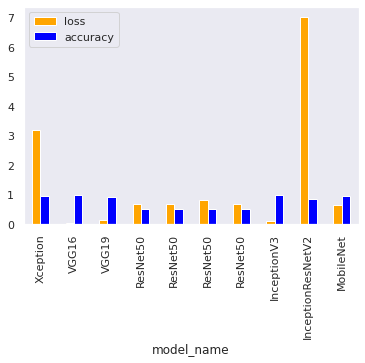

In [ ]:
import seaborn as sns
sns.set(style='dark')
df.set_index('model_name').plot(kind='bar',color=['orange', 'blue'])